<a href="https://colab.research.google.com/github/jeanmhuang/Quant-Momentum-Strategies/blob/main/momentum_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Sharpe Ratio: 0.69
Max Drawdown: 50.23%
Total Trades: 4


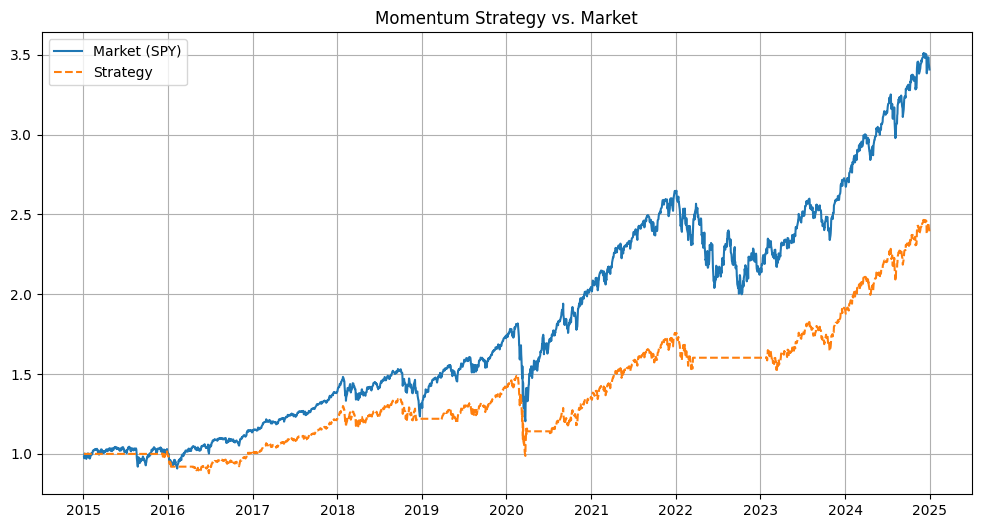

In [2]:
# 📌 Step 1: Install yfinance
!pip install yfinance --quiet

# 📌 Step 2: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📌 Step 3: Download SPY Data
data = yf.download('SPY', start='2015-01-01', end='2024-12-31')
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# 📌 Step 4: Generate Signals
data['Signal'] = 0
data.iloc[50:, data.columns.get_loc('Signal')] = np.where(
    data['MA50'].iloc[50:] > data['MA200'].iloc[50:], 1, 0
)
data['Position'] = data['Signal'].shift()

# 📌 Step 5: Calculate Returns
data['Daily Return'] = data['Close'].pct_change()
data['Strategy Return'] = data['Position'] * data['Daily Return']

# 📌 Step 6: Cumulative Returns
data['Cumulative Market Return'] = (1 + data['Daily Return']).cumprod()
data['Cumulative Strategy Return'] = (1 + data['Strategy Return']).cumprod()

# 📌 Step 7: Performance Metrics
sharpe_ratio = np.sqrt(252) * data['Strategy Return'].mean() / data['Strategy Return'].std()
max_drawdown = (data['Cumulative Strategy Return'].cummax() - data['Cumulative Strategy Return']).max()
total_trades = data['Position'].diff().fillna(0).abs().sum() / 2

print("Sharpe Ratio:", round(sharpe_ratio, 2))
print("Max Drawdown:", f"{max_drawdown:.2%}")
print("Total Trades:", int(total_trades))

# 📌 Step 8: Plotting
plt.figure(figsize=(12,6))
plt.plot(data['Cumulative Market Return'], label='Market (SPY)')
plt.plot(data['Cumulative Strategy Return'], label='Strategy', linestyle='--')
plt.title('Momentum Strategy vs. Market')
plt.legend()
plt.grid(True)
plt.show()



